In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
col_Names=["userId", "productId", "ratings", "timestamp"]
data = pd.read_csv('ratings_Electronics.csv',names=col_Names)

In [5]:
#newDataFrame = data.copy()

In [6]:
data.groupby('productId')['ratings'].mean().sort_values(ascending=False).head() 


productId
BT008V9J9U    5.0
B0058PPK8Y    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
Name: ratings, dtype: float64

In [7]:
data.groupby('productId')['ratings'].count().sort_values(ascending=False).head() 


productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: ratings, dtype: int64

In [8]:
ratingDf = pd.DataFrame(data.groupby('productId')['ratings'].mean())  
ratingDf['num of ratings'] = pd.DataFrame(data.groupby('productId')['ratings'].count()) 
ratingDf.head()

,ratings,num of ratings
productId,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


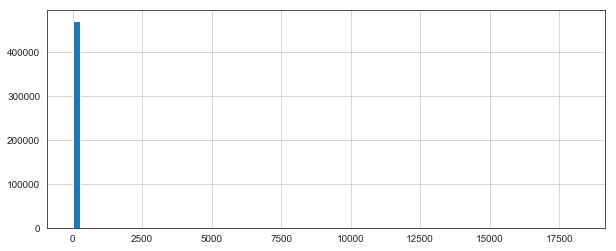

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('white') 
%matplotlib inline
plt.figure(figsize =(10, 4))
ratingDf['num of ratings'].hist(bins = 70)


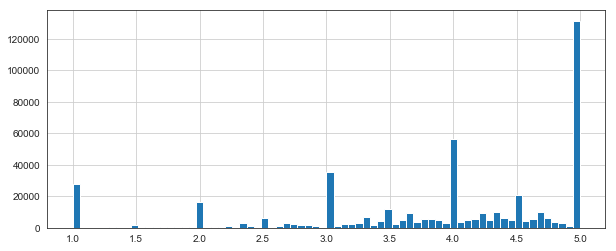

In [10]:
plt.figure(figsize =(10, 4)) 
  
ratingDf['ratings'].hist(bins = 70)

In [11]:
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [13]:
data.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [14]:
data.isnull().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

In [15]:
data.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [17]:
new_data = data[data.groupby('userId')['userId'].transform('size')>=50]

In [18]:
new_data_rat = new_data.copy()

In [19]:
new_data_rat.groupby('userId')['ratings'].mean().sort_values(ascending=False).head()

userId
A23WPWLYT3P1CZ    5.0
A2PB325LKXYDOL    5.0
A3DL29NLZ7SXXG    5.0
A2DKQQIZ793AV5    5.0
A2TN0U8173HM7A    5.0
Name: ratings, dtype: float64

In [20]:
new_data_rat.groupby('userId')['ratings'].count().sort_values(ascending=False).head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: ratings, dtype: int64

In [21]:
ratings_mean_count = pd.DataFrame(new_data_rat.groupby('userId')['ratings'].mean()) 

In [22]:
ratings_mean_count.head()

,ratings
userId,
A100UD67AHFODS,4.508621
A100WO06OQR8BQ,3.651515
A105S56ODHGJEK,3.838235
A105TOJ6LTVMBG,3.845070
A10AFVU66A79Y1,4.184615


In [23]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_data_rat.groupby('userId')['ratings'].count())  

In [24]:
ratings_mean_count.head()

,ratings,rating_counts
userId,,
A100UD67AHFODS,4.508621,116
A100WO06OQR8BQ,3.651515,132
A105S56ODHGJEK,3.838235,68
A105TOJ6LTVMBG,3.845070,71
A10AFVU66A79Y1,4.184615,65


In [25]:
ratings_mean_count.sort_values(by='rating_counts', ascending=False)

,ratings,rating_counts
userId,,
A5JLAU2ARJ0BO,3.861538,520
ADLVFFE4VBT8,4.283433,501
A3OXHLG6DIBRW8,4.451807,498
A6FIAB28IS79,4.183295,431
A680RUE1FDO8B,4.406404,406
A1ODOGXEYECQQ8,4.305263,380
A36K2N527TXXJN,4.525478,314
A2AY4YUOX2N1BQ,4.559486,311
AWPODHOB4GFWL,4.392857,308


In [26]:
#Building item item Collaborative based recommendation system

In [27]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy

In [28]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import surprise; print("surprise", surprise.__version__)

Windows-7-6.1.7601-SP1
Python 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
surprise 1.1.0


In [29]:
col_Names=["userId", "productId", "ratings", "timestamp"]
df = pd.read_csv('ratings_Electronics.csv',names=col_Names)
new_df=df.drop('timestamp',axis=1)

In [30]:
new_df.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [31]:
new_df.groupby('userId')['ratings'].count().reset_index().sort_values('ratings', ascending=False)[:10]

,userId,ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406
755206,A1ODOGXEYECQQ8,380
2424036,A36K2N527TXXJN,314
1451394,A2AY4YUOX2N1BQ,311
4100926,AWPODHOB4GFWL,308
1277963,A25C2M3QF9G7OQ,296


In [32]:
min_user_ratings = 50
filter_users = new_df['userId'].value_counts() >= min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

In [33]:
df_new = new_df[(new_df['userId'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(new_df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(7824482, 3)
The new data frame shape:	(125871, 3)


In [34]:
df_new.head()
df_new_frac = df_new.sample(frac=0.1)

In [35]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [36]:
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering,KNNBaseline,NMF,KNNBasic,KNNWithMeans,KNNWithZScore,CoClustering
from surprise.model_selection import cross_validate


In [37]:
reader = Reader(rating_scale=(1, 5))

In [38]:
data_df = Dataset.load_from_df(df_new_frac[['userId', 'productId', 'ratings']], reader)

In [39]:
data_df

In [40]:
trainset_df1, testset_df1 = train_test_split(data_df, test_size=.3)

In [41]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_df1)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
test_pred = algo.test(testset_df1)

In [43]:
test_pred

[Prediction(uid='A3AVJCB1ZD6ZY5', iid='B007X3VEX4', r_ui=5.0, est=3.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3EXWV8FNSSFL6', iid='B000WPDKRI', r_ui=5.0, est=4.2619750283768445, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A506HOOCVL8GW', iid='B0051OKCHG', r_ui=1.0, est=4.2619750283768445, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A33YZNZIRA3H97', iid='B00E12FJK4', r_ui=4.0, est=4.2619750283768445, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1UEL5C1N6E5SE', iid='B0000Y5TIY', r_ui=4.0, est=4.2619750283768445, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ATNOI7E8GTIVE', iid='B002U42XD6', r_ui=5.0, est=4.2619750283768445, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2F4HP0J5VNOYR', iid='B004TB7GGC', r_ui=5.0, est=4.26

In [44]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.1103


1.110283731198103